# Endangered Species in US National Parks

Here are a few questions that this project will seek to answer:

- What is the distribution of conservation status for each category of species?
- Are certain types of species more likely to be placed under conservation statuses than others?
- Which parks have the greatest abundance of life?
- Is there a relationship between the abundance of plants and the abundance of animals in national parks?

## Loading the Data
There are two separate CSV files:
+ species_info.csv
    + Contains data about different species and their conservation status. 
+ observations.csv
    + Holds recorded sightings of different species at several national parks for the past 7 days.

Using Pandas, each of these will be loaded into a dataframe for examination and initial exploration.

In [1]:
import pandas as pd

species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

In [2]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


The ***species*** dataframe contains the following columns:
+ **category** - class of animal
+ **scientific_name** - the scientific name of each species
+ **common_name** - the common names of each species
+ **conservation_status** - each species’ current conservation status


In [3]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


The ***observations*** dataframe contains the following columns:
+ **scientific_name** - the scientific name of each species
+ **park name** - Park where species were found
+ **observations** - the number of times each species was observed at park

## Exploring and Cleaning the Data
Let's get a feel for what kind of data we are working with, and the state of that data. To clean this data I will be checking each dataframe for
+ missing data
+ duplicated data

Depending on what is missing or duplicated, I will be handiling that in a variety of ways.

### Species
Let's start by observing the state of the values in the **species** dataframe.

In [4]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [5]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

The only outright null data in species is contained in the **conservation_status** column, where 96.7% of the data is null. Based the unique values in this column, each appears to be a descriptive term to indicate the level of threat a species is classified under. I will be making the assumption that the null values in this column are structurally missing to communicate that the species are of no concern, as naturally, the majority of species are. To more clearly communicate this, the null values will be replaced with 'Non-Concern'.

In [6]:
species.conservation_status.fillna("Non-Concern", inplace=True)
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB


In [7]:
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [8]:
species.scientific_name.nunique()

5541

In [9]:
species.common_names.nunique()

5504

+ The number of unique scientific names does not match the number of rows in the table.
    + Are there duplicate rows?
    + Is one scientific name matched to conflicting conservation statuses? 
+ The number of unique scientific names, and the number of unique common names also do not match.
    + Could this be because one common name is applied to numerous different scientific names?
    + Has a generic placeholder name been used for missing data?

In [10]:
species.duplicated().value_counts()

False    5824
Name: count, dtype: int64

No two rows are *exact* duplicates.

In [11]:
species.scientific_name.duplicated().value_counts()

scientific_name
False    5541
True      283
Name: count, dtype: int64

But, some scientific names are repeated.

In [12]:
species.scientific_name.value_counts()

scientific_name
Castor canadensis            3
Canis lupus                  3
Hypochaeris radicata         3
Columba livia                3
Puma concolor                3
                            ..
Carex                        1
Hexastylis shuttleworthii    1
Hexastylis heterophylla      1
Hexastylis arifolia          1
Tribulus terrestris          1
Name: count, Length: 5541, dtype: int64

In [13]:
print(species[species.scientific_name == 'Castor canadensis'])
print(species[species.scientific_name == 'Canis lupus'])
print(species[species.scientific_name == 'Puma concolor'])

     category    scientific_name             common_names conservation_status
49     Mammal  Castor canadensis  American Beaver, Beaver         Non-Concern
3050   Mammal  Castor canadensis          American Beaver         Non-Concern
4475   Mammal  Castor canadensis                   Beaver         Non-Concern
     category scientific_name     common_names conservation_status
8      Mammal     Canis lupus        Gray Wolf          Endangered
3020   Mammal     Canis lupus  Gray Wolf, Wolf         In Recovery
4448   Mammal     Canis lupus  Gray Wolf, Wolf          Endangered
     category scientific_name                 common_names conservation_status
16     Mammal   Puma concolor      Panther (Mountain Lion)         Non-Concern
3022   Mammal   Puma concolor  Cougar, Mountain Lion, Puma         Non-Concern
4451   Mammal   Puma concolor                Mountain Lion         Non-Concern


For the repeated scientific names it appears there is variation in the common names, and some discrepancy in the conservation status. However, it makes sense that one type of species may be considered at different levels of conservation status depending on the geographical area. An example that comes to mind is the grizzly bear: a species that is extinct in California, but non-threatened in Alaska.

To deal with these dupilcates, I will be removing duplicates of matching scientific name *and* conservation status. 

In [14]:
species.drop_duplicates(subset=["scientific_name", "conservation_status"], inplace=True)
species.scientific_name.duplicated().value_counts()

scientific_name
False    5541
True        2
Name: count, dtype: int64

281 out of the 283 repeated scientific names only listed differing common-names.

In [15]:
species.scientific_name.value_counts()

scientific_name
Oncorhynchus mykiss                2
Canis lupus                        2
Clethrionomys gapperi gapperi      1
Valeriana dioica var. sylvatica    1
Gaultheria humifusa                1
                                  ..
Viola pubescens                    1
Viola porterana                    1
Viola pedata                       1
Viola odorata                      1
Tribulus terrestris                1
Name: count, Length: 5541, dtype: int64

In [16]:
print(species[species.scientific_name == 'Oncorhynchus mykiss'])
print(species[species.scientific_name == 'Canis lupus'])

     category      scientific_name   common_names conservation_status
560      Fish  Oncorhynchus mykiss  Rainbow Trout         Non-Concern
3283     Fish  Oncorhynchus mykiss  Rainbow Trout          Threatened
     category scientific_name     common_names conservation_status
8      Mammal     Canis lupus        Gray Wolf          Endangered
3020   Mammal     Canis lupus  Gray Wolf, Wolf         In Recovery


In [17]:
species.common_names.duplicated().value_counts()

common_names
False    5230
True      313
Name: count, dtype: int64

In [18]:
species.common_names.value_counts()

common_names
Brachythecium Moss                                                            7
Dicranum Moss                                                                 7
Bryum Moss                                                                    6
Sphagnum                                                                      6
Panic Grass                                                                   6
                                                                             ..
American Bog Violet, Dog Violet                                               1
Canadian White Violet                                                         1
Large-Leaf White Violet, Large-Leaved Violet                                  1
Field Pansy, Wild Pansy                                                       1
Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur    1
Name: count, Length: 5230, dtype: int64

In [19]:
print(species[species.common_names == 'Brachythecium Moss'])
print(species[species.common_names == 'Sphagnum'])

               category           scientific_name        common_names  \
2812  Nonvascular Plant   Brachythecium digastrum  Brachythecium Moss   
2813  Nonvascular Plant  Brachythecium oedipodium  Brachythecium Moss   
2814  Nonvascular Plant   Brachythecium oxycladon  Brachythecium Moss   
2815  Nonvascular Plant    Brachythecium plumosum  Brachythecium Moss   
2816  Nonvascular Plant    Brachythecium rivulare  Brachythecium Moss   
2817  Nonvascular Plant   Brachythecium rutabulum  Brachythecium Moss   
2818  Nonvascular Plant  Brachythecium salebrosum  Brachythecium Moss   

     conservation_status  
2812         Non-Concern  
2813         Non-Concern  
2814         Non-Concern  
2815         Non-Concern  
2816         Non-Concern  
2817         Non-Concern  
2818         Non-Concern  
               category         scientific_name common_names  \
2997  Nonvascular Plant         Sphagnum affine     Sphagnum   
2998  Nonvascular Plant  Sphagnum capillifolium     Sphagnum   
3003  N

When it comes to repeated common names, it appears that the common names can be used to more generally refer to a variety of closely related species.

### Observations
Next, let's see that state of the values that are in the **observations** dataframe.

In [20]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


The are no outright null values in the observations table.

In [21]:
observations.duplicated().value_counts()

False    23281
True        15
Name: count, dtype: int64

In [22]:
observations.drop_duplicates(inplace=True)

There were 15 instances of rows which were *exact* duplicates. These have been removed from the table. 

In [23]:
observations.duplicated(subset=["scientific_name","park_name"]).value_counts()

False    22164
True      1117
Name: count, dtype: int64

However, there are still 1117 instances where a different number of observations have been reported for the same species, in the same park.

In [24]:
name_and_park = observations[['scientific_name','park_name']]
name_and_park.value_counts().reset_index().head(10)

,scientific_name,park_name,count
0,Holcus lanatus,Bryce National Park,3
1,Canis lupus,Great Smoky Mountains National Park,3
2,Canis lupus,Yosemite National Park,3
3,Myotis lucifugus,Yosemite National Park,3
4,Hypochaeris radicata,Bryce National Park,3
5,Procyon lotor,Bryce National Park,3
6,Hypochaeris radicata,Yellowstone National Park,3
7,Hypochaeris radicata,Yosemite National Park,3
8,Puma concolor,Yosemite National Park,3
9,Puma concolor,Yellowstone National Park,3


In [25]:
print(observations[(observations.scientific_name == "Holcus lanatus")&(observations.park_name=="Bryce National Park")])
print(observations[(observations.scientific_name == "Canis lupus")&(observations.park_name=="Yosemite National Park")])
print(observations[(observations.scientific_name == "Hypochaeris radicata")&(observations.park_name=="Yellowstone National Park")])

     scientific_name            park_name  observations
6237  Holcus lanatus  Bryce National Park            83
8405  Holcus lanatus  Bryce National Park           117
8561  Holcus lanatus  Bryce National Park            96
      scientific_name               park_name  observations
1294      Canis lupus  Yosemite National Park            35
19330     Canis lupus  Yosemite National Park           117
19987     Canis lupus  Yosemite National Park            44
            scientific_name                  park_name  observations
11787  Hypochaeris radicata  Yellowstone National Park           244
13317  Hypochaeris radicata  Yellowstone National Park           262
22333  Hypochaeris radicata  Yellowstone National Park           220


Considering observations should hold recorded sightings of different species at several national parks for the past 7 days, there can not be different numbers of observations of the same species in the same park. To address this issue I will be perserving the mean number of observations for each duplicate. 

In [26]:
no_dups = observations.groupby(by=['scientific_name','park_name']).mean().reset_index()
no_dups.observations = no_dups.observations.apply(lambda x: int(round(x,0)))

print(no_dups[(no_dups.scientific_name == "Holcus lanatus")&(no_dups.park_name=="Bryce National Park")])
print(no_dups[(no_dups.scientific_name == "Canis lupus")&(no_dups.park_name=="Yosemite National Park")])
print(no_dups[(no_dups.scientific_name == "Hypochaeris radicata")&(no_dups.park_name=="Yellowstone National Park")])

     scientific_name            park_name  observations
9808  Holcus lanatus  Bryce National Park            99
     scientific_name               park_name  observations
3219     Canis lupus  Yosemite National Park            65
            scientific_name                  park_name  observations
10222  Hypochaeris radicata  Yellowstone National Park           242


In [27]:
no_dups.duplicated(subset=["scientific_name","park_name"]).value_counts()

False    22164
Name: count, dtype: int64

In [28]:
no_dups.describe()

,observations
count,22164.000000
mean,142.313978
std,69.805835
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [29]:
observations.describe()

,observations
count,23281.000000
mean,142.280357
std,69.885439
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [30]:
observations = no_dups

## Analyzing the Data

### Conservation Statuses and Species Type

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

all_status_by_category = species.groupby(['category', 'conservation_status']).count().reset_index()
all_status_by_category = pd.pivot(data=all_status_by_category, index='conservation_status', columns='category', values='scientific_name')
all_status_by_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,6.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Non-Concern,72.0,413.0,115.0,146.0,328.0,73.0,4216.0
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


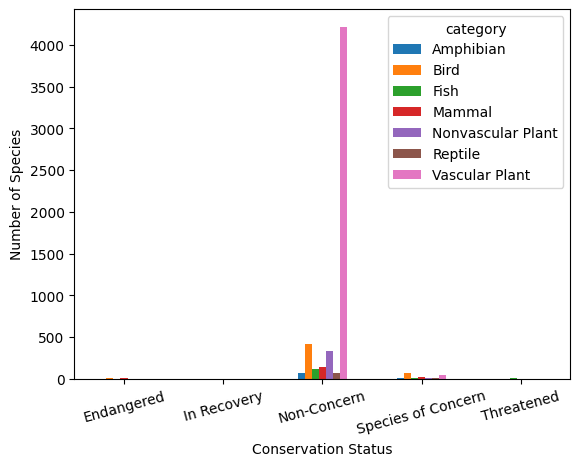

<Figure size 640x480 with 0 Axes>

In [32]:
all_status_by_category.plot(kind='bar')
plt.xticks(rotation=15)
plt.xlabel("Conservation Status")
plt.ylabel("Number of Species")
plt.show()
plt.clf()

Since so many species are of no conservation concern, the above chart does not provide a good vizual comparison of the different levels of concern. To remendy this, let's remove the species of no concern.

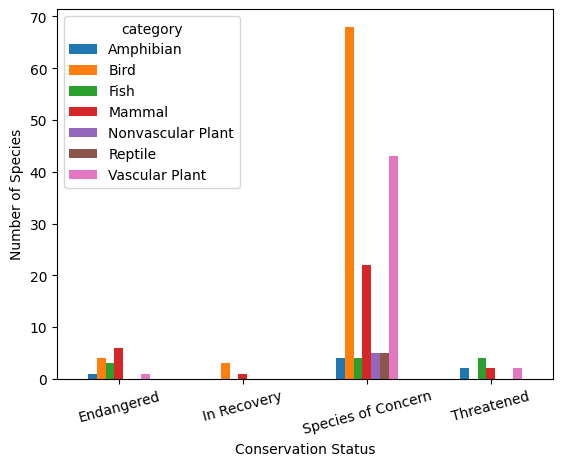

<Figure size 640x480 with 0 Axes>

In [33]:
status_by_category = species[species.conservation_status != 'Non-Concern'].groupby(['category', 'conservation_status']).count().reset_index()
status_by_category = pd.pivot(data=status_by_category, index='conservation_status', columns='category', values='scientific_name')
status_by_category.plot(kind='bar')
plt.xticks(rotation=15)
plt.xlabel("Conservation Status")
plt.ylabel("Number of Species")
plt.show()
plt.clf()

We can now more clearly compare the differing levels of concern for each type of species.
+ Mammals and birds have the greatest numbers of endagered species.
+ Birds and mammals have the greatest numbers of in recovery species.
+ Birds and vascular plants have the greatest numbers of species of concern.
+ Fish have the greatest number of threatened species.

However, the chart is displaying counts of each species. Since there are different total numbers for each category of species, comparing counts directly is not meaningful. It would be more helpful to use proportions for each species.

In [34]:
status_by_category_prop = status_by_category #Exclude non-concern
#status_by_category_prop = all_status_by_category #Include non-concern
for cat in status_by_category_prop:
    total_of_category = len(species[species.category == cat])
    status_by_category_prop[cat] = status_by_category_prop[cat].apply(lambda x: 100*x/total_of_category)
status_by_category_prop

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.265823,0.819672,2.380952,3.389831,NaN,NaN,0.023463
In Recovery,NaN,0.614754,NaN,0.564972,NaN,NaN,NaN
Species of Concern,5.063291,13.934426,3.174603,12.429379,1.501502,6.410256,1.008916
Threatened,2.531646,NaN,3.174603,1.129944,NaN,NaN,0.046926


In [35]:
status_by_category_prop['average']=status_by_category_prop.sum(axis=1)/7

In [36]:
status_by_category_prop

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant,average
conservation_status,,,,,,,,
Endangered,1.265823,0.819672,2.380952,3.389831,NaN,NaN,0.023463,1.125677
In Recovery,NaN,0.614754,NaN,0.564972,NaN,NaN,NaN,0.168532
Species of Concern,5.063291,13.934426,3.174603,12.429379,1.501502,6.410256,1.008916,6.217482
Threatened,2.531646,NaN,3.174603,1.129944,NaN,NaN,0.046926,0.983303


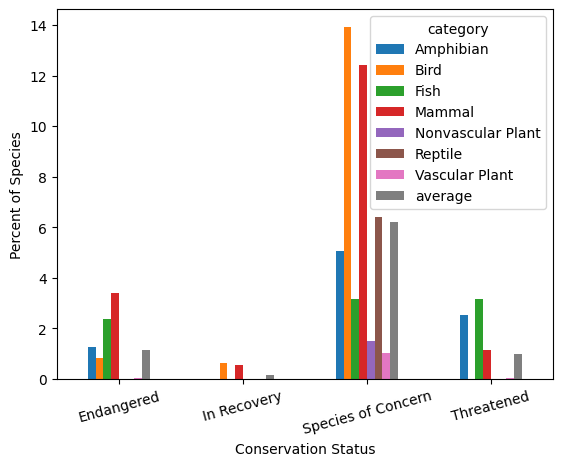

<Figure size 640x480 with 0 Axes>

In [37]:
status_by_category_prop.plot(kind='bar')
plt.xticks(rotation=15)
plt.xlabel("Conservation Status")
plt.ylabel("Percent of Species")
plt.show()
plt.clf()

Comparing proprtions, we now see a different story.
+ The greatest proprtions of mammals and fish are facing endagerment.
+ A near-equal proprotion of mammals and birds are in recovery.
+ The greatest proportions of mammals and birds are in recovery.
+ The greatest proportions of fish and amphibians are threatened.

In [38]:
conservation_percent = status_by_category_prop.sum().reset_index()
conservation_percent.columns = ['category','perc_in_conservation']
conservation_percent['perc_not_in_conservation'] = 100-conservation_percent['perc_in_conservation']
conservation_percent

,category,perc_in_conservation,perc_not_in_conservation
0,Amphibian,8.860759,91.139241
1,Bird,15.368852,84.631148
2,Fish,8.730159,91.269841
3,Mammal,17.514124,82.485876
4,Nonvascular Plant,1.501502,98.498498
5,Reptile,6.410256,93.589744
6,Vascular Plant,1.079305,98.920695
7,average,8.494994,91.505006


Overall, the two species at greatest risk are mammals (17.5%) and birds (15.4%). But, are the observed rates of conservation statuses for each species statistically siginificant? Or are these observations due to chance? To determine the relatioship between categorical variables, a chi-square test will be used.

The chi-square test is to examine whether two nominal variables are independent or not. Our question is whether conservation status is dependent on species type. To perform this test, we need the frequencies actually observed in a bivariate table.

In [39]:
conservation_counts = species[species.conservation_status != 'Non-Concern'].groupby(['category', 'conservation_status']).scientific_name.count().reset_index()
conservation_counts = conservation_counts.groupby('category').sum().reset_index()
conservation_counts = conservation_counts.drop('conservation_status', axis=1)
conservation_counts.columns=['category', 'in_conservation']
conservation_counts['not_in_conservation'] = species[species.conservation_status == 'Non-Concern'].groupby(['category']).scientific_name.count().reset_index()['scientific_name']
conservation_counts

,category,in_conservation,not_in_conservation
0,Amphibian,7,72
1,Bird,75,413
2,Fish,11,115
3,Mammal,31,146
4,Nonvascular Plant,5,328
5,Reptile,5,73
6,Vascular Plant,46,4216


Since plants and animals likely face different challenges for their conservation statuses, I will be running  a separate chi-square test on the animals and the plants to assess the relationship between species and conservation status.

In [40]:
from scipy.stats import chi2_contingency
import numpy as np

animals_v_conservation = conservation_counts[~conservation_counts.category.str.contains("Plant")]
animals_v_conservation

,category,in_conservation,not_in_conservation
0,Amphibian,7,72
1,Bird,75,413
2,Fish,11,115
3,Mammal,31,146
5,Reptile,5,73


**Null Hypothesis** - For different types of animals, there is no relationship between species type and conservation status.

**Alternative Hypothesis** - For different types of animals, there is a relationship between species type and conservation status.

In [41]:
animals_v_conservation = np.array(animals_v_conservation.drop("category", axis=1))
chi2, pval, dof, exp = chi2_contingency(animals_v_conservation)
print(f"Chi2:{chi2}\nP-value{pval}\nExpected:{exp}")

Chi2:11.08635398944666
P-value0.02561046637703992
Expected:[[ 10.75        68.25      ]
 [ 66.40506329 421.59493671]
 [ 17.14556962 108.85443038]
 [ 24.08544304 152.91455696]
 [ 10.61392405  67.38607595]]


The p-value from our chi-square test for animals is 0.0256, which is below the 0.05 threshold. This means we should reject the null hypothesis, and accept that, for animals, there is a statistically significant relationship between species type, and conservation status. It is likely *not* coincidence that birds and mammals face conservation statuses at higer rates than fish, amphibians, and reptiles.

In [42]:
plants_v_conservation = conservation_counts[conservation_counts.category.str.contains("Plant")]
plants_v_conservation

,category,in_conservation,not_in_conservation
4,Nonvascular Plant,5,328
6,Vascular Plant,46,4216


**Null Hypothesis** - For different types of plants, there is no relationship between species type and conservation status.

**Alternative Hypothesis** - For different types of plants, there is a relationship between species type and conservation status.

In [43]:
plants_v_conservation = np.array(plants_v_conservation.drop("category", axis=1))
chi2, pval, dof, exp = chi2_contingency(plants_v_conservation)
print(f"Chi2:{chi2}\nP-value{pval}\nExpected:{exp}")

Chi2:0.19069121233812064
P-value0.6623419491381985
Expected:[[3.69597388e+00 3.29304026e+02]
 [4.73040261e+01 4.21469597e+03]]


The p-value from our chi-square test for plants is 0.662, which is well above the 0.05 threshold. This means we should accept the null hypothesis; that is, for plants there is **NOT** a statistically significant relationship between species type, and conservation status.

In [44]:
animal_status = animals_v_conservation.sum(axis=0)
animal_status = pd.DataFrame(animal_status)
animal_status.columns = ['animal']
animal_status.index = ['in_conservation', 'not_in_conservation']
animal_status

,animal
in_conservation,129
not_in_conservation,819


In [45]:
plant_status = plants_v_conservation.sum(axis=0)
plant_status = pd.DataFrame(plant_status)
plant_status.columns = ['plant']
plant_status.index = ['in_conservation', 'not_in_conservation']
plant_status

,plant
in_conservation,51
not_in_conservation,4544


In [46]:
type_v_status = plant_status.join(animal_status).reset_index()
type_v_status.columns = ['conservation_status','plant','animal']
type_v_status

,conservation_status,plant,animal
0,in_conservation,51,129
1,not_in_conservation,4544,819


In [47]:
type_v_status = type_v_status.T

type_v_status

,0,1
conservation_status,in_conservation,not_in_conservation
plant,51,4544
animal,129,819


In [48]:
new_header = type_v_status.iloc[0] #grab the first row for the header
type_v_status = type_v_status[1:] #take the data less the header row
type_v_status.columns = new_header #set the header row as the df header
type_v_status

conservation_status,in_conservation,not_in_conservation
plant,51,4544
animal,129,819


**Null Hypothesis** - For plants compared to animals, there is no relationship between species type and conservation status.

**Alternative Hypothesis** - For plants compared to animals, there is a relationship between species type and conservation status.

In [49]:
type_v_status.reset_index()
type_v_status = np.array(type_v_status)
chi2, pval, dof, exp = chi2_contingency(type_v_status)
print(f"Chi2:{chi2}\nP-value{pval}\nExpected:{exp}")

Chi2:386.70961108794063
P-value4.307314667696459e-86
Expected:[[ 149.21522641 4445.78477359]
 [  30.78477359  917.21522641]]


The p-value from our chi-square test for animals is 4.31e-86, which is *well* below the 0.05 threshold. This means we should reject the null hypothesis, and accept that, there is a statistically significant relationship between species classification as plant or animal, and conservation status. It is likely *not* coincidence that animals face conservation statuses at higer rates than plants.

### Abundance by Park

In [50]:
abundance = observations.groupby("park_name").observations.sum().reset_index()
abundance['observations_percent'] = abundance.observations.apply(lambda x: x/abundance.observations.sum())
abundance

,park_name,observations,observations_percent
0,Bryce National Park,548231,0.173807
1,Great Smoky Mountains National Park,410888,0.130265
2,Yellowstone National Park,1373599,0.435476
3,Yosemite National Park,821529,0.260452


In [61]:
observations_and_type = observations.merge(species.drop_duplicates(subset='scientific_name'))\
                                    .drop(['common_names','scientific_name','conservation_status'], axis=1)
observations_and_type = observations_and_type.groupby(['park_name', 'category']).observations.sum().reset_index()
observations_and_type['is_plant'] = observations_and_type.category.str.contains("Plant")
observations_and_type = observations_and_type.groupby(['park_name', 'is_plant']).observations.sum().reset_index()
observations_and_type = observations_and_type.pivot(index='park_name', columns='is_plant',values='observations')
observations_and_type.columns = ['animal', 'plant']
observations_and_type['total_observations'] = observations_and_type.animal + observations_and_type.plant
observations_and_type['percent_animal_overall'] = observations_and_type.animal/observations_and_type.total_observations.sum()
observations_and_type['percent_plant_overall'] = observations_and_type.plant/observations_and_type.total_observations.sum()
observations_and_type['split_animal'] = observations_and_type.animal/observations_and_type.total_observations
observations_and_type['split_plant'] = observations_and_type.plant/observations_and_type.total_observations
#observations_and_type.drop('total_observations', axis=1, inplace=True)
observations_and_type

,animal,plant,total_observations,percent_animal_overall,percent_plant_overall,split_animal,split_plant
park_name,,,,,,,
Bryce National Park,92595,455636,548231,0.029356,0.144452,0.168898,0.831102
Great Smoky Mountains National Park,67910,342978,410888,0.021530,0.108735,0.165276,0.834724
Yellowstone National Park,229758,1143841,1373599,0.072841,0.362635,0.167267,0.832733
Yosemite National Park,137187,684342,821529,0.043493,0.216959,0.166990,0.833010


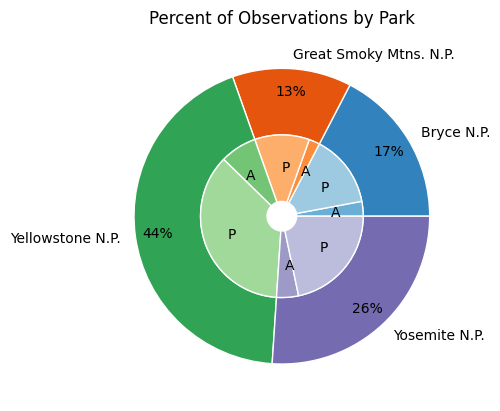

In [60]:
data=np.array(observations_and_type[['percent_animal_overall','percent_plant_overall']])
outer_labels=['Bryce N.P.', 'Great Smoky Mtns. N.P.', 'Yellowstone N.P.', 'Yosemite N.P.']
inner_labels=["A", "P", "A", "P", "A", "P", "A", "P",]

size = 0.45
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(4)*4)
inner_colors = cmap([1,2, 5,6, 9,10, 13,14, 17,18])

fig, ax = plt.subplots()
ax.pie(data.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=outer_labels, autopct='%.0f%%', pctdistance=0.85)

ax.pie(data.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=inner_labels, labeldistance=0.6)
plt.title("Percent of Observations by Park")
plt.show()

In [53]:
observations_and_type = observations_and_type.reset_index()
observations_and_type

,park_name,animal,plant,percent_animal,percent_plant
0,Bryce National Park,92595,455636,0.029356,0.144452
1,Great Smoky Mountains National Park,67910,342978,0.021530,0.108735
2,Yellowstone National Park,229758,1143841,0.072841,0.362635
3,Yosemite National Park,137187,684342,0.043493,0.216959


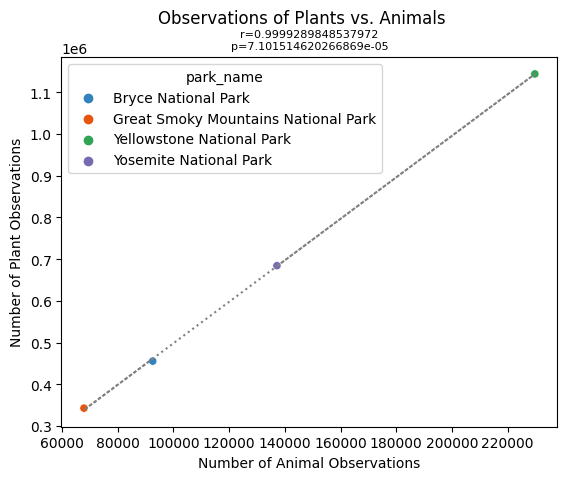

<Figure size 640x480 with 0 Axes>

In [54]:
sns.scatterplot(data=observations_and_type, x='animal', y='plant', hue='park_name', palette=sns.color_palette(palette=['#3182BD', '#E6550D', '#31A354', '#756BB1']))
plt.xlabel("Number of Animal Observations")
plt.ylabel("Number of Plant Observations")

model = sm.OLS.from_formula("plant ~ animal", data=observations_and_type)
results = model.fit()
exp = results.predict(observations_and_type.animal)

plt.plot(observations_and_type.animal, exp, color='gray', linestyle=':')

cor_animal_plant, pval = stats.pearsonr(observations_and_type.animal, observations_and_type.plant)
plt.suptitle("Observations of Plants vs. Animals")
plt.title(f"r={cor_animal_plant}\np={pval}", size=8)

plt.show()
plt.clf()

In [62]:
results.params

Intercept    1054.567478
animal          4.972185
dtype: float64

## Conclusions
#### What is the distribution of conservation status for each category of species?
+ The vast majority of species have *no* conservation status; that is, they are of no concern.
    + 91.5% of all species are of no concern.
    + Greater portions of plant life are in this category than animal life, with vasular and non-vascular plants both above 98%.
    + Mammals have the smallest portion of species of no concern, at ~82.5%
+ The next greatest conservation status is *species of concern*.
    + 6.2% of all species are a species of conern.
    + Mammals and birds are well-above this average amount.
        + 12.4% of mammals are a species of conern.
        + 13.9% of birds are a species of concern.
+ Species that are *endangered* and *threatened* are the next greatest classifications, in order.
    + Each covers approximately 1% of species.
        + 1.1% are endangered.
        + 1.0% are threatened.
        + Mammals (3.4%) and fish (2.4%) make up the majority of endagered species.
        + Fish (3.2%) and amphibians (2.5%) make up the majority of threatened species.
+ Less than 0.2% of all species are considered *in recovery*
    + Only mammals and birds have been given this status. 
#### Are certain types of species more likely to be placed under conservation statuses than others?
+ Observationally, we see that mammals and birds are given some conservation status at a greater rate than all other types of species.
+ Observationally, we see that plants are less likely to be given a conservation status than animals.
+ To test if our observations are significatly different from what we could expect in the general population, we can apply a chi-square test.
    + Since plants and animals likely face different challenges for their conservation statuses, let's consider separate chi-square test on the animals and the plants to assess the relationship between species and conservation status.
1. Are animals more likely to face conservation status than plants?
       
|          | In Conservation | Not In Conservation |
|:--------:|:---------------:|:-------------------:|
|  Plant   |  51             |  4544               |
|  Animal  |  129            |  819                |

+ The p-value from our chi-square test for animals is 4.31e-86, which is *well* below the 0.05 threshold. This means we should reject the null hypothesis, and accept that, there is a statistically significant relationship between species classification as plant or animal, and conservation status. It is likely *not* coincidence that animals face conservation statuses at higer rates than plants.

2. Are certain clssifications of animals more likely to face conservation status than others?
       
|          | In Conservation | Not In Conservation |
|:--------:|:---------------:|:-------------------:|
|  Ambibian   |  7   |  72   |
|  Bird  |  75   |  413   |
|  Fish  |  11   |  115   |
|  Mammal  |  31  |  146   |
|  Reptile  |  5   |  73   |

+ The p-value from our chi-square test for animals is 0.0256, which is below the 0.05 threshold. This means we should reject the null hypothesis, and accept that, for animals, there is a statistically significant relationship between species type, and conservation status. It is likely *not* coincidence that birds and mammals face conservation statuses at higer rates than fish, amphibians, and reptiles.

3. Are certain classifications of plant more likely to face conservation status than others?
       
|          | In Conservation | Not In Conservation |
|:--------:|:---------------:|:-------------------:|
|  Nonvascular Plant   |  5  |  328   |
|  Vascular Plant  |  46     |  4216    |

+ The p-value from our chi-square test for plants is 0.662, which is well above the 0.05 threshold. This means we should accept the null hypothesis; that is, for plants there is **NOT** a statistically significant relationship between species type, and conservation status.


#### Which parks have the greatest abundance of life?
+ Based on the number of total observations in each park, the rankings of abundance of life are...
    1. Yellowstone, with 1373599 total observations. (44% of all observations)
    2. Yosemite, with 821529 total observations (26% of all observations)
    3. Bryce, with 548231 total observations (17% of all observations)
    4. Great Smoky Mountains, with 410888 total observations (13% of all observations)
+ In any given park, the ratio of plant to animal observations is near constant.
    + Approximately 83.3% of all observations are of plant life.
    + Approximately 16.6% of all observations are of animal life.
    + Plants are nearly 5 times as abundant as animals.
#### Is there a relationship between the abundance of plants and the abundance of animals in national parks?
+ There is a near-perfect linear correlation between plant life and animal life.
    + $p = a*4.972185 + 1054.567478$
      + $p=$ the number of plant observations, and $a=$ the number of animal observations.
    + This regression fits the data with a correlation coeficcient of $r=0.99993$
       

